In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns

import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot
from shapely.geometry import Point

import plotly.express as px


In [58]:
df = pd.read_csv(r'C:\Users\Devin\Documents\Olympics2021.csv')
print(df)
df.describe()

                   Countries  Number of Medals  Number of Athletes  \
0                      Japan                40                 586   
1   United States of America                77                 615   
2                      Spain                10                 324   
3                  Australia                36                 470   
4                     Canada                14                 368   
..                       ...               ...                 ...   
80                   Morocco                 1                  48   
81                  Slovakia                 3                  38   
82                     Ghana                 1                  14   
83                  Bulgaria                 2                  41   
84                   Estonia                 2                  33   

    Count of Discipline/Sport  Number of Teams       GDP  
0                          35               48   5065.00  
1                          28            

,Number of Medals,Number of Athletes,Count of Discipline/Sport,Number of Teams,GDP
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,9.047059,118.317647,5.011765,11.976471,939.944188
std,14.491299,134.120523,6.348030,12.968805,2816.504979
min,1.000000,2.000000,1.000000,1.000000,1.616000
25%,2.000000,35.000000,1.000000,3.000000,55.970000
50%,3.000000,66.000000,2.000000,6.000000,212.500000
75%,8.000000,133.000000,6.000000,16.000000,537.600000
max,77.000000,615.000000,35.000000,48.000000,20940.000000


Text(0, 0.5, 'Number of Medals per Country')

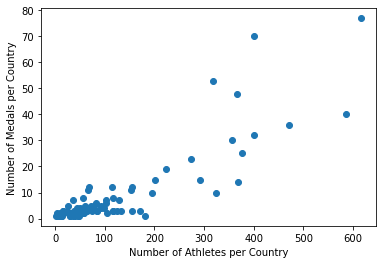

In [55]:
df.head(10)
plt.plot(df['Number of Athletes'], df['Number of Medals'], marker='o', linestyle='none')


Text(0, 0.5, 'Medals per Country')

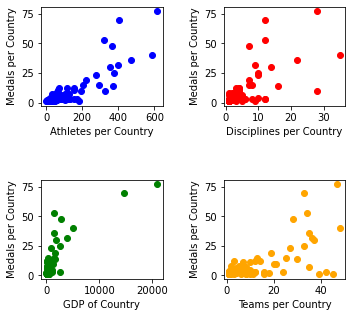

In [5]:
grid = plt.GridSpec(2, 4, wspace=0.5, hspace=0.75)
plt.figure(figsize=(12,5))
x_ath = df['Number of Athletes']
x_cod = df['Count of Discipline/Sport']
x_gdp = df['GDP']
x_team = df['Number of Teams']
y = df['Number of Medals']

plt.subplot(grid[0, 0])
plt.scatter(df['Number of Athletes'], y, color='blue')
plt.xlabel('Athletes per Country')
plt.ylabel('Medals per Country')

plt.subplot(grid[0 ,1])
plt.scatter(df['Count of Discipline/Sport'], y, color='red')
plt.xlabel('Disciplines per Country')
plt.ylabel('Medals per Country')

plt.subplot(grid[1 ,1])
plt.scatter(df['Number of Teams'], y, color= 'orange')
plt.xlabel('Teams per Country')
plt.ylabel('Medals per Country')

plt.subplot(grid[1, 0])
plt.scatter(df['GDP'], y, color='green')
plt.xlabel('GDP of Country')
plt.ylabel('Medals per Country')


C:\Users\Devin\AppData\Local\Temp\ipykernel_1055504\2873026847.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



[0.09280544]
-1.9334624533639424
73.777 % of the variation in number of medals a country wins can be explain by the number of athletes each country sends.


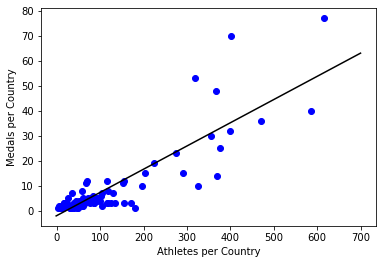

In [64]:
model1 = LinearRegression(fit_intercept=True)
X_ath = x_ath[:, np.newaxis]
X_ath.shape
model1.fit(X_ath,y)
print(model1.coef_)
print(model1.intercept_)
xfit = np.linspace(-2, 700)
Xfit = xfit[:, np.newaxis]
yfit = model1.predict(Xfit)
plt.scatter(x_ath, y, color='blue')
plt.plot(Xfit, yfit, color='black');
plt.xlabel('Athletes per Country')
plt.ylabel('Medals per Country')

correlation_matrix = np.corrcoef(x_ath, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(round(r_squared*100, 3), '% of the variation in number of medals a country wins can be explain by the number of athletes each country sends.')


C:\Users\Devin\AppData\Local\Temp\ipykernel_65984\1846209375.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_cod = x_cod[:, np.newaxis]


[1.53558966]
1.3510447512199182
45.249 % of the variation in number of medals a country wins can be explain by the number of disciplines a country participates in.


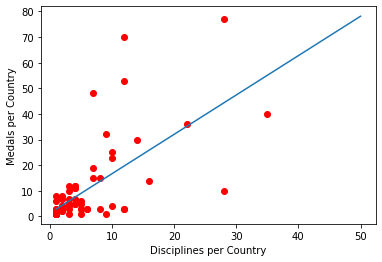

In [183]:
model2 = LinearRegression(fit_intercept=True)
X_cod = x_cod[:, np.newaxis]
X_cod.shape
model2.fit(X_cod,y)
print(model2.coef_)
print(model2.intercept_)
xfit = np.linspace(1, 50)
Xfit = xfit[:, np.newaxis]
yfit = model2.predict(Xfit)
plt.scatter(x_cod, y, color='red')
plt.plot(Xfit, yfit);
plt.xlabel('Disciplines per Country')
plt.ylabel('Medals per Country')

correlation_matrix = np.corrcoef(x_cod, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(round(r_squared*100, 3), '% of the variation in number of medals a country wins can be explain by the number of disciplines a country participates in.')

C:\Users\Devin\AppData\Local\Temp\ipykernel_65984\3762900027.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_gdp = x_gdp[:, np.newaxis]


[0.00422817]
5.072816551201039
67.532 % of the variation in number of medals a country wins can be explained by the GDP of a country


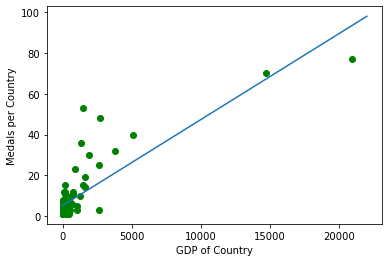

In [182]:
model3 = LinearRegression(fit_intercept=True)
X_gdp = x_gdp[:, np.newaxis]
X_gdp.shape
model3.fit(X_gdp,y)
print(model3.coef_)
print(model3.intercept_)
xfit = np.linspace(5, 22000)
Xfit = xfit[:, np.newaxis]
yfit = model3.predict(Xfit)
plt.scatter(x_gdp, y, color='green')
plt.plot(Xfit, yfit);
plt.xlabel('GDP of Country')
plt.ylabel('Medals per Country')

correlation_matrix = np.corrcoef(x_gdp, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(round(r_squared*100, 3), '% of the variation in number of medals a country wins can be explained by the GDP of a country')


C:\Users\Devin\AppData\Local\Temp\ipykernel_65984\3698995857.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_team = x_team [:, np.newaxis]


[0.74130302]
0.1688650618381864
44.013 % of the variation in number of medals a country wins can be explained by the amount of team events a country participated in.


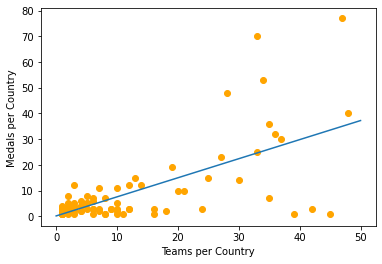

In [184]:
model4 = LinearRegression(fit_intercept=True)
X_team = x_team [:, np.newaxis]
X_team.shape
model4.fit(X_team,y)
print(model4.coef_)
print(model4.intercept_)
xfit = np.linspace(0, 50)
Xfit = xfit[:, np.newaxis]
yfit = model4.predict(Xfit)
plt.scatter(x_team , y, color='orange')
plt.plot(Xfit, yfit);
plt.xlabel('Teams per Country')
plt.ylabel('Medals per Country')

correlation_matrix = np.corrcoef(x_team, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(round(r_squared*100, 3), '% of the variation in number of medals a country wins can be explained by the amount of team events a country participated in.')


In [63]:
import plotly.express as px
x_ath = df['Number of Athletes']
x_cod = df['Count of Discipline/Sport']
x_gdp = df['GDP']
x_team = df['Number of Teams']
y = df['Number of Medals']
plt.figure(figsize=(100,70))
px.choropleth(y, locations=df['Countries'], 
                    locationmode='country names', color=y, 
                    hover_data= ['Number of Medals'], range_color=[1,75], 
                    color_continuous_scale='reds', 
                    title='Number of Medals per Country')

<Figure size 7200x5040 with 0 Axes>